In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import copy
import json

In [2]:
curr_path=os.getcwd()

# Load paths from config file
with open('config.json', 'r') as f:
    config = json.load(f)

path = config['path']
labeltrainpath = config['labeltrainpath']
imgtrainpath = config['imgtrainpath']
labeltestpath = config['labeltestpath']
imgtestpath = config['imgtestpath']
labelvalpath = config['labelvalpath']
imgvalpath = config['imgvalpath']

In [3]:
image_size=640

In [4]:
if os.path.exists(path):
    for dirname in os.listdir(path):
        dirpath = os.path.join(path, dirname)

        if os.path.isdir(dirpath):
            for file in os.listdir(dirpath):
                if file.endswith('.jpg') or file.endswith('.txt'):
                    filepath = os.path.join(dirpath, file)
                    newname = dirname + "_" + file

                    if file.endswith(".txt"):  # if label file
                        new_label_path = os.path.join(labeltrainpath, newname)
                        shutil.copy(filepath, new_label_path)

                    elif file.endswith((".jpg", ".JPG")):  # if image file
                        img = cv2.imread(filepath)
                        img_resized = cv2.resize(img, (image_size, image_size))
                        resized_file_path = os.path.join(imgtrainpath, newname)
                        cv2.imwrite(resized_file_path, img_resized)

In [5]:
# function to check if all elements in the list are actually the same
def are_all_elements_same(lst):
    if not lst:
        return True  # An empty list is considered to have all elements the same.

    first_element = lst[0]
    for element in lst[1:]:
        if element != first_element:
            return False

    return True

In [6]:
for file in os.listdir(labeltrainpath):
    classes_list=[]
    with open(os.path.join(labeltrainpath, file), "r") as f:
        for line in f:
            class_id,_,_,_,_=line.strip().split(" ")
            classes_list.append(class_id) # creating list of all unique animal types in given image
            
    # Checking if different types of animals are present in image
    if not are_all_elements_same(classes_list): 
        filepath=os.path.join(labeltrainpath, file)
        newpath=os.path.join(labeltestpath, file)
        shutil.move(filepath, newpath) # moving label file to test path
        basename=os.path.splitext(file)[0]
        print(basename) # printing the image name
        imgfilename=basename+'.jpg'
        oldimgfilepath=os.path.join(imgtrainpath, imgfilename)
        newimgfilepath=os.path.join(imgtestpath, imgfilename) 
        shutil.move(oldimgfilepath, newimgfilepath) # moving image to test path

zebra_338
elephant_291
rhino_375
elephant_290
elephant_288
buffalo_297
buffalo_291
buffalo_299
elephant_345
rhino_256
elephant_166
zebra_339
buffalo_301
zebra_073
buffalo_273
buffalo_298
rhino_238
buffalo_300


In [7]:
len(os.listdir(imgtestpath)), len(os.listdir(labeltestpath))

(18, 18)

In [8]:
# function to obtain bounding box coordinates from text label files
def get_bbox_from_label(text_file_path):
    bbox_list=[]
    with open(text_file_path, "r") as file:
        for line in file:
            class_id,x_centre,y_centre,width,height=line.strip().split(" ")
            x1=(float(x_centre)+(float(width)/2))*image_size
            x0=(float(x_centre)-(float(width)/2))*image_size
            y1=(float(y_centre)+(float(height)/2))*image_size
            y0=(float(y_centre)-(float(height)/2))*image_size
            
            vertices=np.array([[int(x0), int(y0)], [int(x1), int(y0)], 
                               [int(x1),int(y1)], [int(x0),int(y1)]])
            bbox_list.append(vertices)      
    return tuple(bbox_list)

In [9]:
red=(255,0,0) 

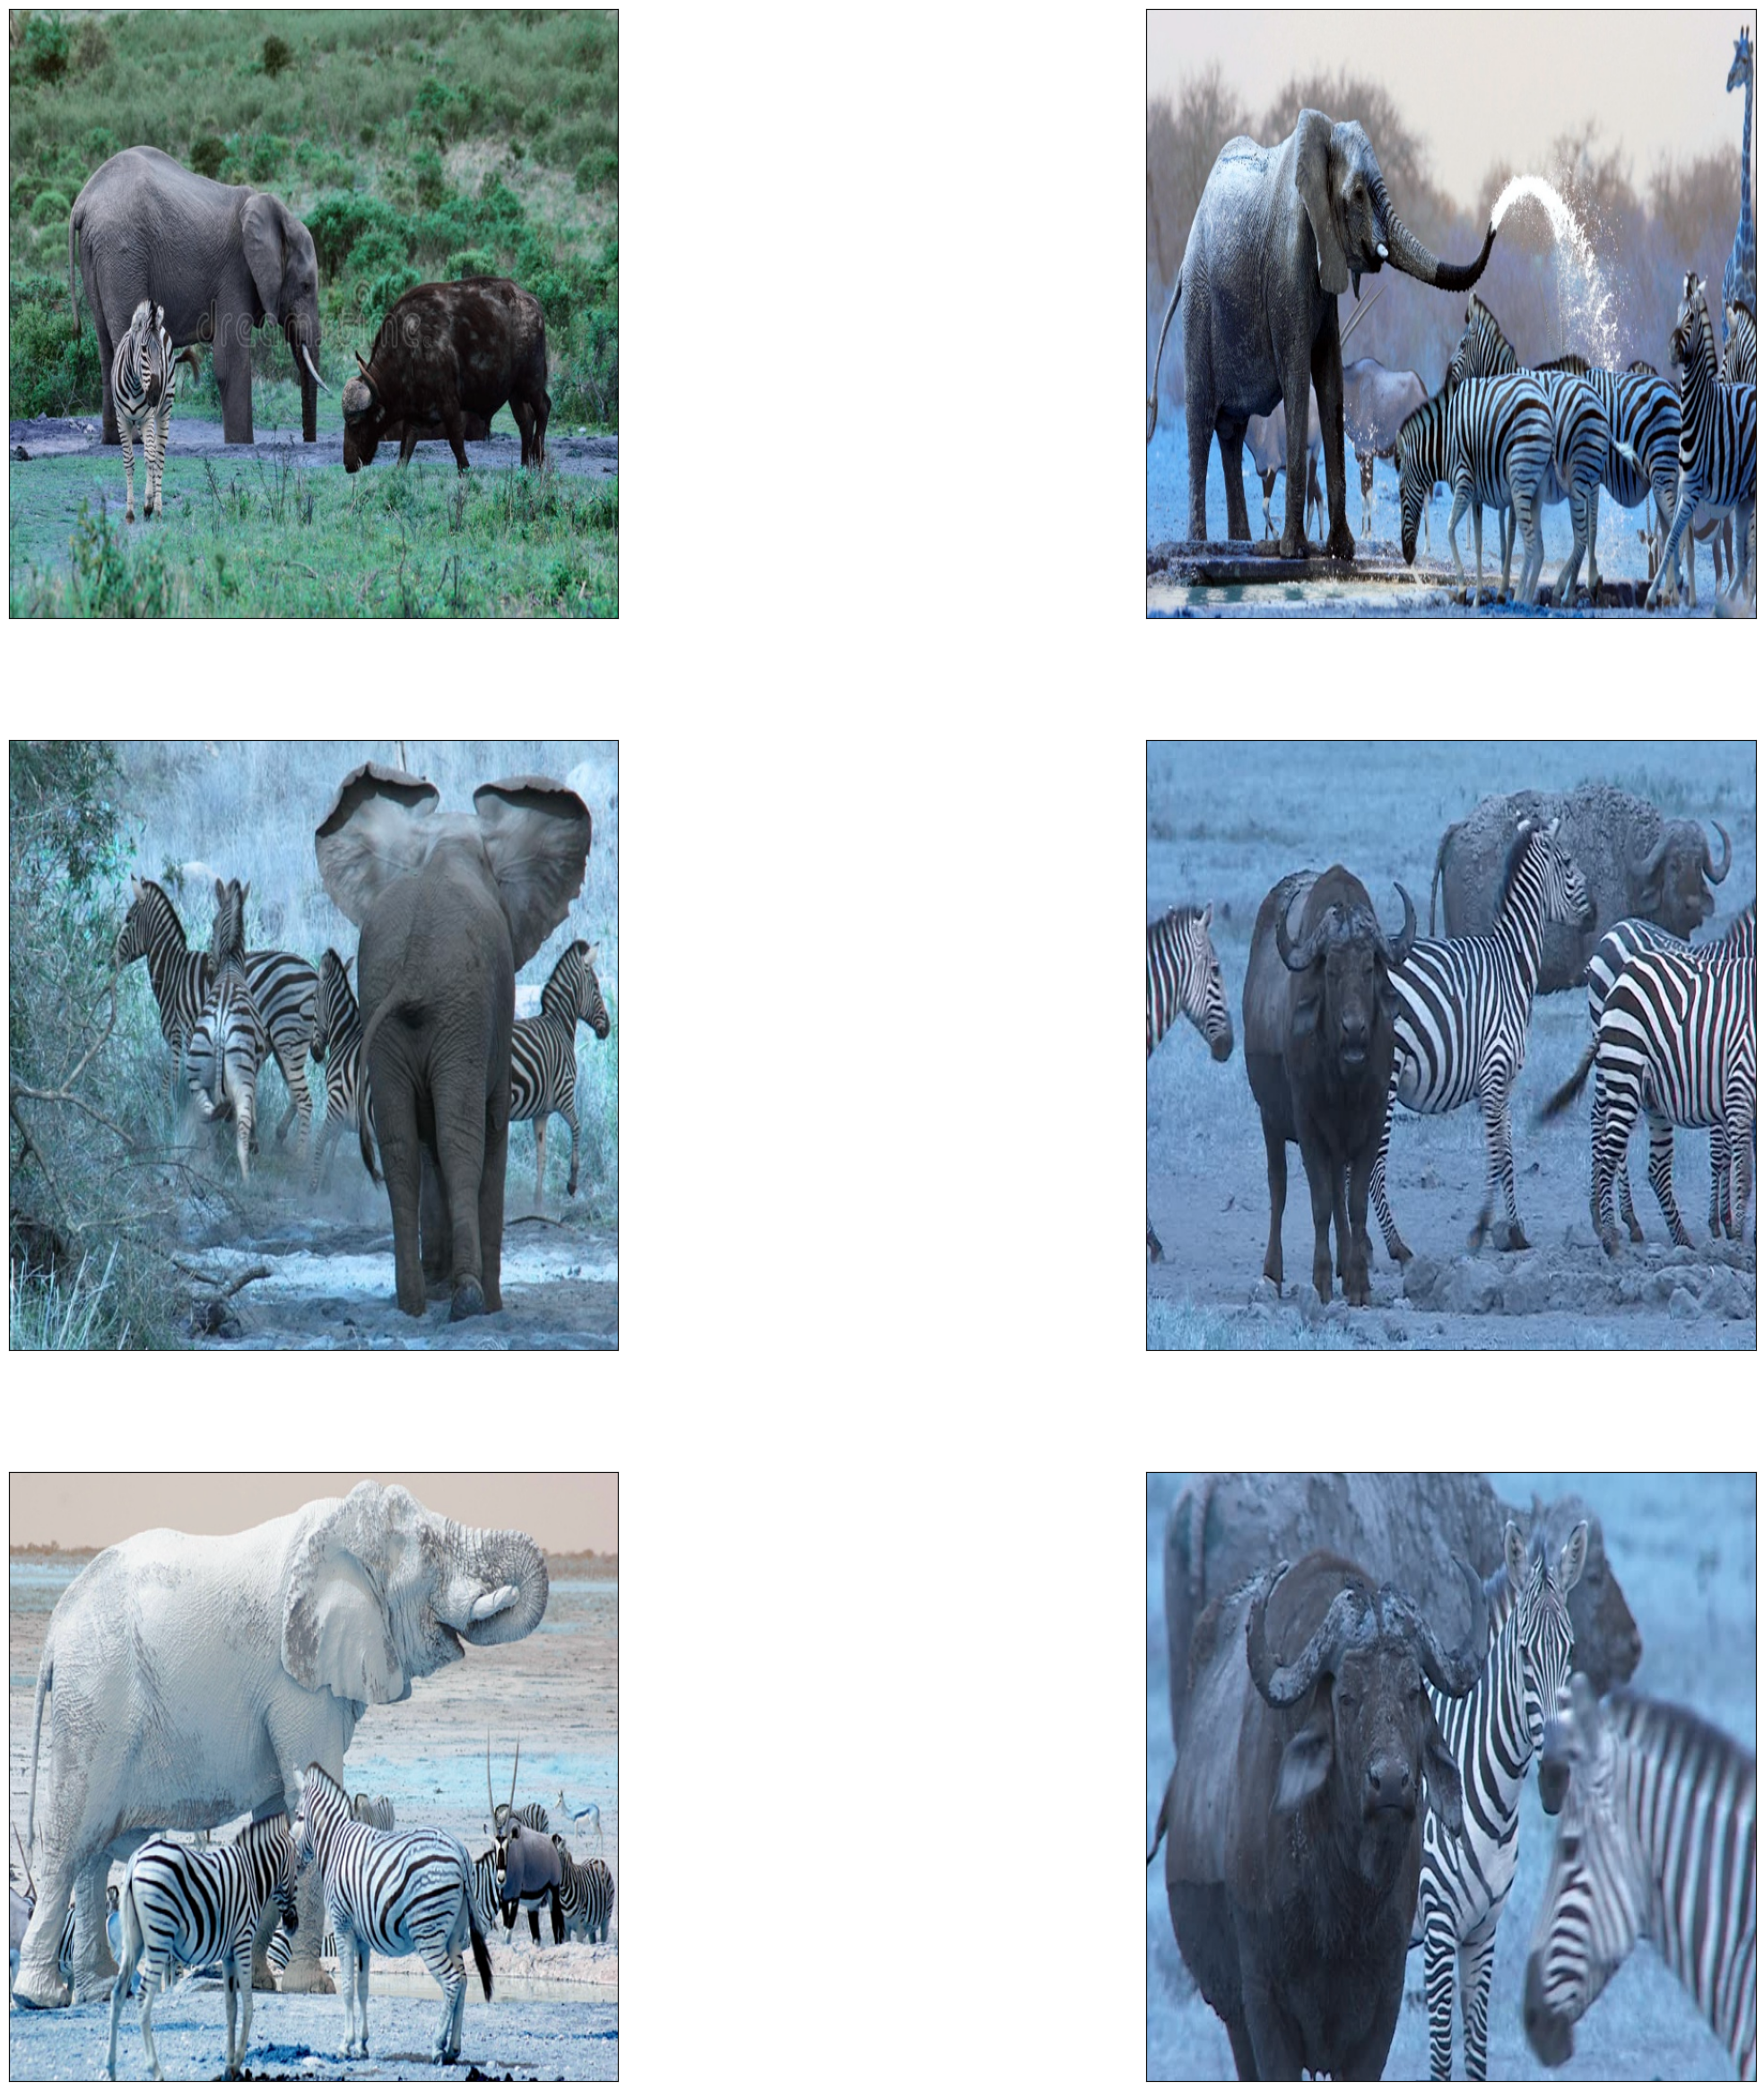

In [10]:
plt.figure(figsize=(30,30))
for i in range(6):
    test_image=os.path.join(imgtestpath, os.listdir(imgtestpath)[i])
    ax=plt.subplot(3,2,i+1)
    
    # Display actual image
    plt.imshow(cv2.imread(test_image)) 
    plt.xticks([])
    plt.yticks([])

In [11]:
len(os.listdir(imgtrainpath)), len(os.listdir(labeltrainpath))

(1483, 1486)

In [12]:
factor=0.2 

for file in random.sample(os.listdir(imgtrainpath), int(len(os.listdir(imgtrainpath))*factor)):
    basename=os.path.splitext(file)[0]
    textfilename=basename+'.txt'
    labelfilepath=os.path.join(labeltrainpath, textfilename)
    labeldestpath=os.path.join(labelvalpath, textfilename)
    imgfilepath=os.path.join(imgtrainpath, file)
    imgdestpath=os.path.join(imgvalpath, file)
    shutil.move(imgfilepath, imgdestpath)
    shutil.move(labelfilepath, labeldestpath)

In [13]:
len(os.listdir(imgtrainpath)), len(os.listdir(labeltrainpath))

(1187, 1190)

In [14]:
len(os.listdir(imgvalpath)), len(os.listdir(labelvalpath))

(1084, 1084)

In [15]:
def get_bbox_from_label(text_file_path):
    bbox_list=[]
    with open(text_file_path, "r") as file:
        for line in file:
            class_id,x_centre,y_centre,width,height=line.strip().split(" ")
            x1=(float(x_centre)+(float(width)/2))*image_size
            x0=(float(x_centre)-(float(width)/2))*image_size
            y1=(float(y_centre)+(float(height)/2))*image_size
            y0=(float(y_centre)-(float(height)/2))*image_size
            
            vertices=np.array([[int(x0), int(y0)], [int(x1), int(y0)], 
                               [int(x1),int(y1)], [int(x0),int(y1)]])
            bbox_list.append(vertices)      
    return tuple(bbox_list)

In [16]:
red=(255,0,0) 

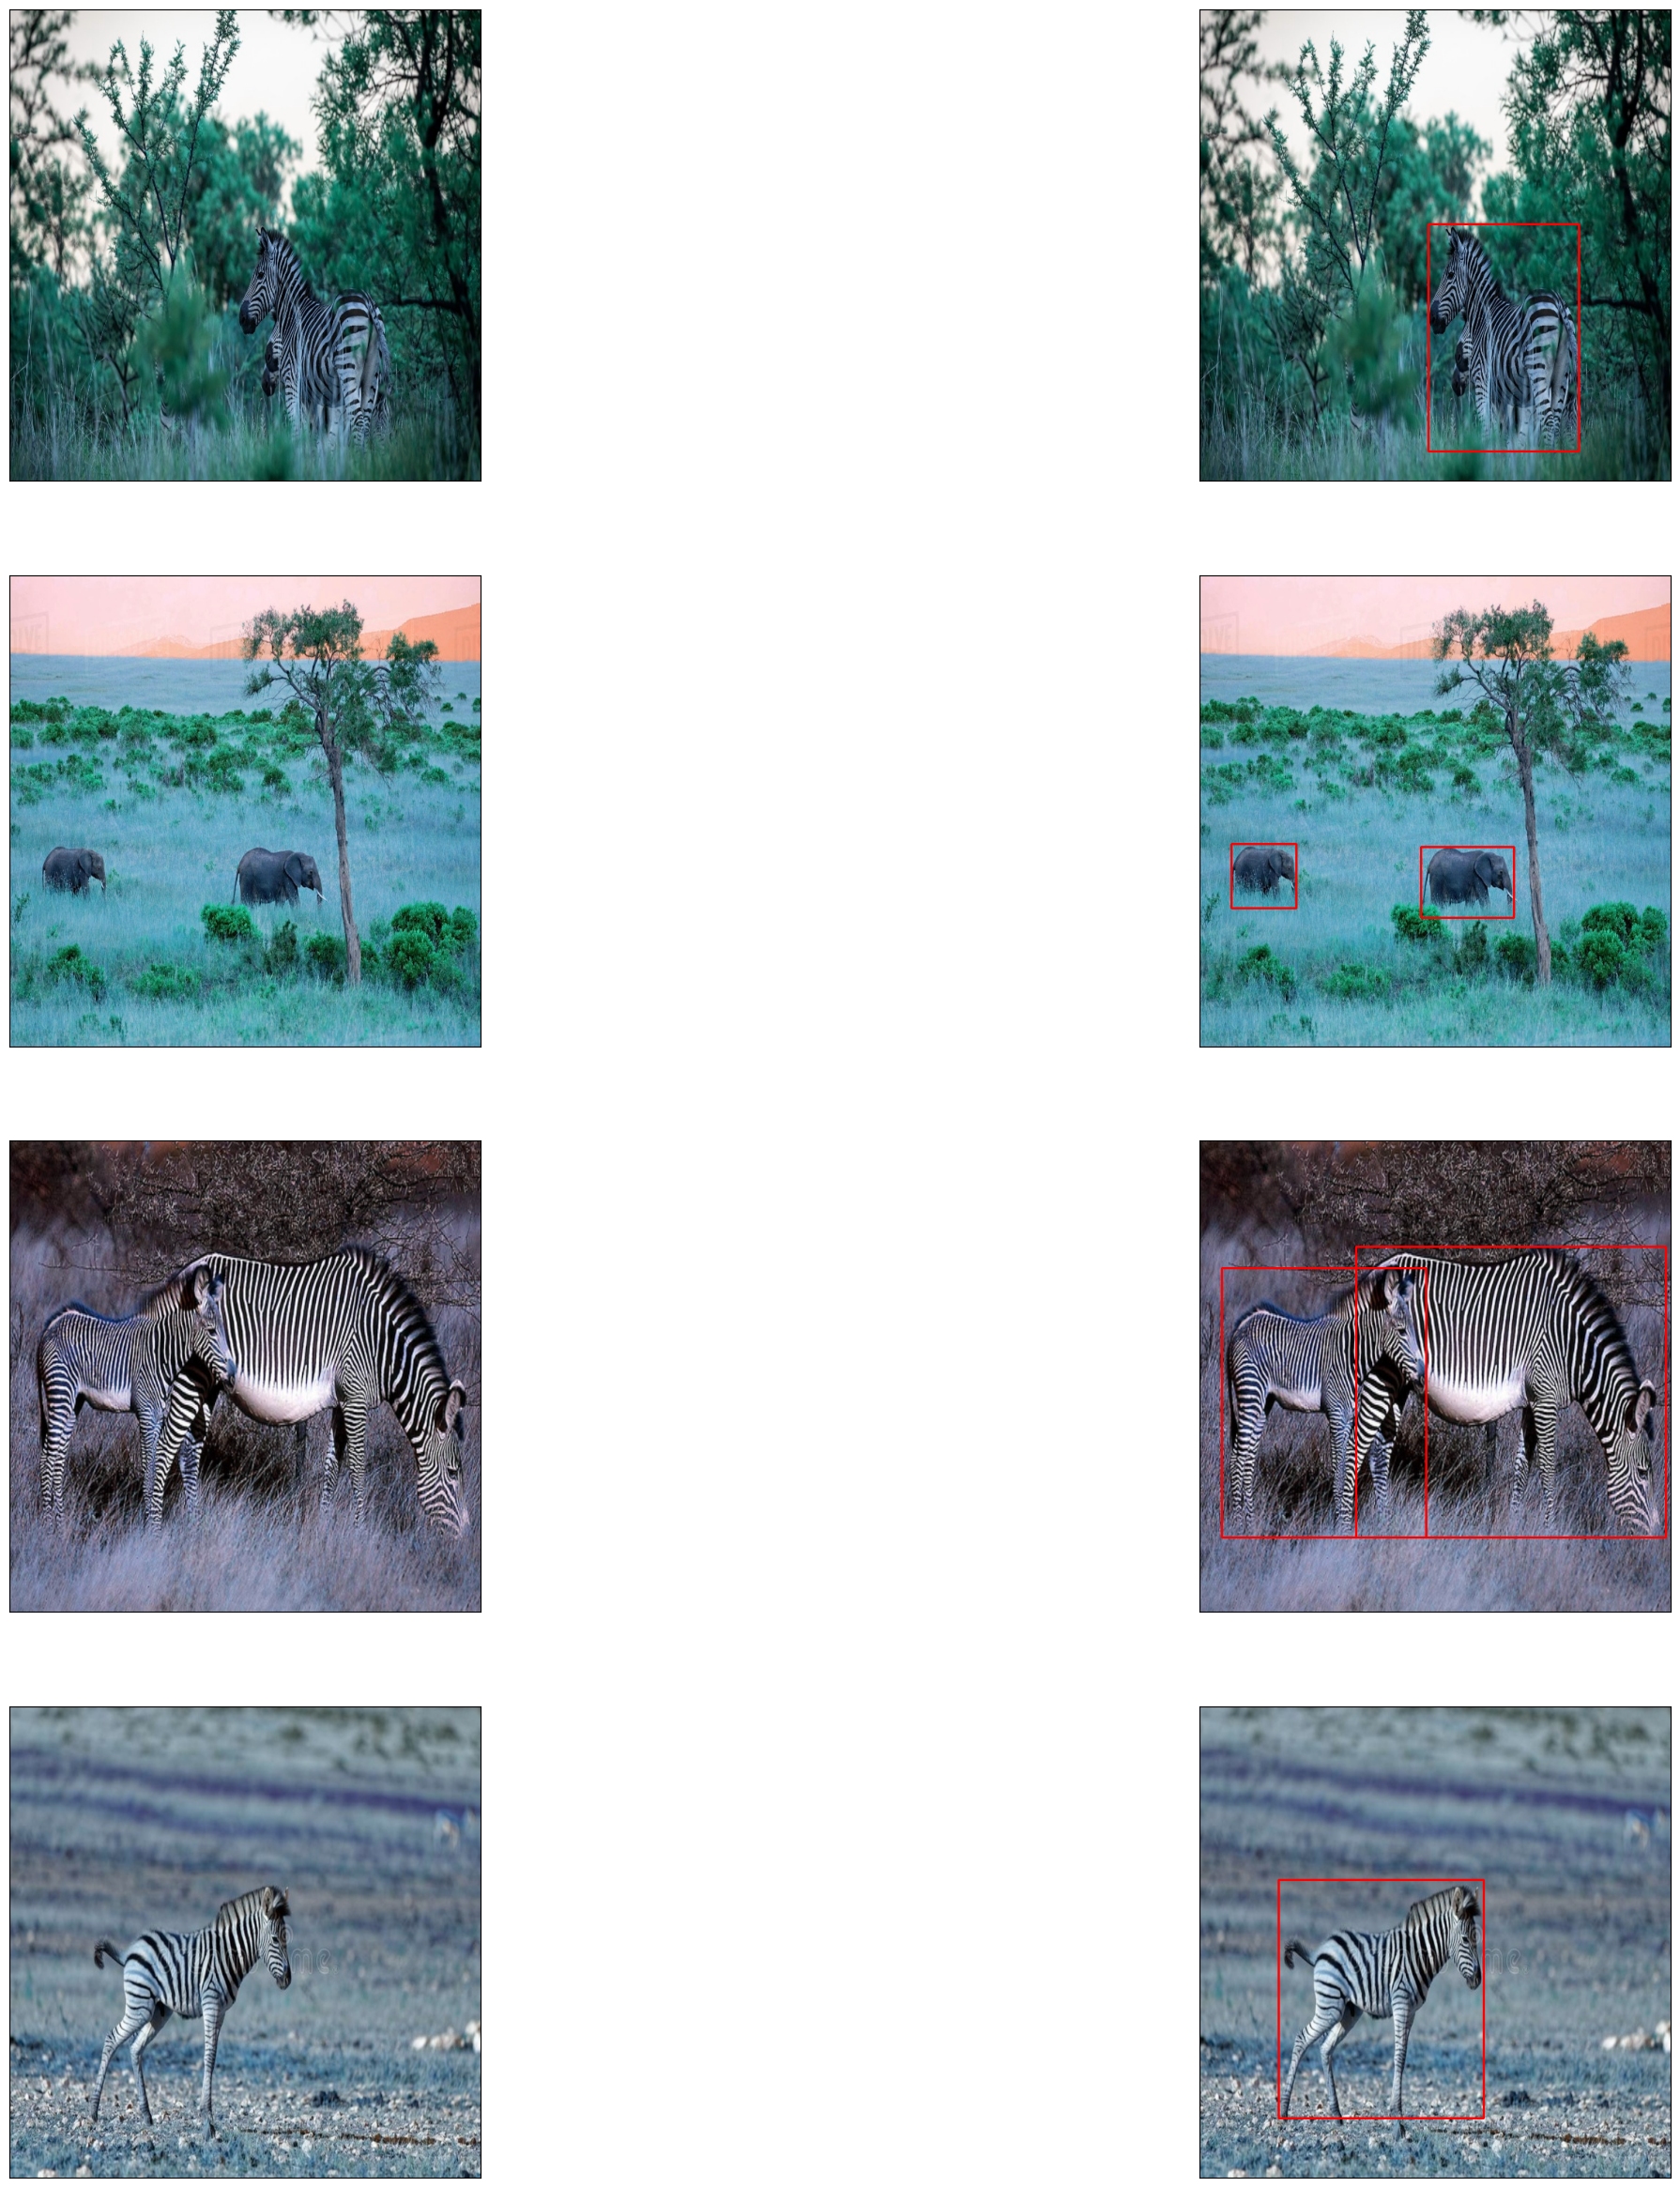

In [17]:
# Drawing bounding box for random images in training data
plt.figure(figsize=(30,30))
for i in range(1,8,2):
    k=random.randint(0, len(os.listdir(imgtrainpath))-1)
    img_files = sorted(os.listdir(imgtrainpath))
    img_path=os.path.join(imgtrainpath, sorted(os.listdir(imgtrainpath))[k])
    file_name_without_extension = os.path.splitext(os.path.basename(img_path))[0]
    
    txt_file_name = file_name_without_extension + '.txt'
    label_path = os.path.join(labeltrainpath, txt_file_name)

    bbox=get_bbox_from_label(label_path) # extracting bounding box coordinates
    image=cv2.imread(img_path)
    image_copy=copy.deepcopy(image)
    ax=plt.subplot(4, 2, i)
    plt.imshow(image) # displaying image
    plt.xticks([])
    plt.yticks([])
    cv2.drawContours(image_copy, bbox, -1, red, 2) # drawing bounding box on copy of image
    ax=plt.subplot(4, 2, i+1)
    plt.imshow(image_copy) # displaying image with bounding box
    plt.xticks([])
    plt.yticks([])

In [18]:
newline='\n'

In [19]:
# Starting with a comment in config file
ln_1='# Train/val/test sets'+newline

# train, val and test path declaration
ln_2='train: ' +"'"+imgtrainpath+"'"+newline
ln_3='val: ' +"'" + imgvalpath+"'"+newline
ln_4='test: ' +"'" + imgtestpath+"'"+newline
ln_5=newline
ln_6='# Classes'+newline

# names of the classes declaration
ln_7='names:'+newline
ln_8='  0: buffalo'+newline
ln_9='  1: elephant'+newline
ln_10='  2: rhino'+newline
ln_11='  3: zebra'

config_lines=[ln_1, ln_2, ln_3, ln_4, ln_5, ln_6, ln_7, ln_8, ln_9, ln_10, ln_11]

In [20]:
config_path=os.path.join(curr_path, 'config.yaml')
config_path

'/home/patrik/repos/multiple_object_detection/config.yaml'

In [21]:
with open(config_path, 'w') as f:
    f.writelines(config_lines)